In [180]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import mplfinance as mpf
import requests
from bs4 import BeautifulSoup
import os
import pickle
import numpy as np

In [163]:
# gets tickers of top 100 companies in NASDAQ by market value
def getTickers():
    page = requests.get('https://en.wikipedia.org/wiki/NASDAQ-100')
    soup = BeautifulSoup(page.content, 'html.parser')
    rows = soup.find_all('table')[2].find('tbody').find_all('tr')
    del rows[0]
    # print(lists)
    tickers = [item.find_all('td')[1].get_text().strip() for item in rows]
    return tickers

In [164]:
# gets the data for the specified tickers if the argument is empty
def getData(tickers = None):
    if tickers == None:
        tickers = getTickers()
    
    with open('NASDAQ.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    
    if not os.path.exists('./StockData'):
        os.mkdir('StockData')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2016, 12, 31)

    for ticker in tickers:
        try:
            if not os.path.exists('StockData/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('StockData/{}.csv'.format(ticker))
            else:
                print('Data for {} already exists.'.format(ticker))
        except:
            print('Error occured for {}'.format(ticker))
            # error might occur if the company was not publicly listed during the dates speicified
    print('All data retrieved')

In [165]:
getData()

Data for ATVI already exists.
Data for ADBE already exists.
Data for AMD already exists.
Data for ALXN already exists.
Data for ALGN already exists.
Data for GOOGL already exists.
Data for GOOG already exists.
Data for AMZN already exists.
Data for AMGN already exists.
Data for ADI already exists.
Data for ANSS already exists.
Data for AAPL already exists.
Data for AMAT already exists.
Data for ASML already exists.
Data for ADSK already exists.
Data for ADP already exists.
Data for BIDU already exists.
Data for BIIB already exists.
Data for BMRN already exists.
Data for BKNG already exists.
Data for AVGO already exists.
Data for CDNS already exists.
Data for CDW already exists.
Data for CERN already exists.
Data for CHTR already exists.
Data for CHKP already exists.
Data for CTAS already exists.
Data for CSCO already exists.
Data for CTXS already exists.
Data for CTSH already exists.
Data for CMCSA already exists.
Data for CPRT already exists.
Data for COST already exists.
Data for CSX

In [174]:
def compileData():
    with open('NASDAQ.pickle', 'rb') as f:
        tickers = pickle.load(f)
    compiledDf = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('StockData/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns = {'Adj Close': ticker}, inplace=True)
            df.drop(['High', 'Low', 'Close', 'Volume', 'Open'], 1, inplace=True)

            if compiledDf.empty:
                compiledDf = df
            else:
                compiledDf = compiledDf.join(df, how='outer')
        except:
            print('Error with {}.csv file'.format(ticker))
    
    print(compiledDf.head())
    compiledDf.to_csv('NASDAQ_JoinedCloses.csv')
    return compiledDf

In [175]:
df = compileData()

Error with DOCU.csv file
Error with FOXA.csv file
Error with FOX.csv file
Error with MRNA.csv file
Error with ZM.csv file
                ATVI       ADBE     AMD     ALXN  ALGN  GOOGL  GOOG     AMZN  \
Date                                                                           
2000-01-03  1.227554  16.274673  15.500  7.37500   NaN    NaN   NaN  89.3750   
2000-01-04  1.190215  14.909401  14.625  6.93750   NaN    NaN   NaN  81.9375   
2000-01-05  1.194882  15.204173  15.000  7.28125   NaN    NaN   NaN  69.7500   
2000-01-06  1.171544  15.328290  16.000  7.75000   NaN    NaN   NaN  65.5625   
2000-01-07  1.204217  16.072983  16.250  8.25000   NaN    NaN   NaN  69.5625   

                 AMGN        ADI  ...  TCOM  ULTA        VRSN  VRSK      VRTX  \
Date                              ...                                           
2000-01-03  50.853237  30.452473  ...   NaN   NaN  161.444855   NaN  18.78125   
2000-01-04  46.964756  28.911892  ...   NaN   NaN  159.958847   NaN  17.28

In [176]:
# df[:]

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.227554,16.274673,15.500,7.375000,NaN,NaN,NaN,89.375000,50.853237,30.452473,...,NaN,NaN,161.444855,NaN,18.781250,20.749420,NaN,3.091555,7.730755,33.290680
2000-01-04,1.190215,14.909401,14.625,6.937500,NaN,NaN,NaN,81.937500,46.964756,28.911892,...,NaN,NaN,159.958847,NaN,17.281250,19.977560,NaN,3.680422,7.908767,32.534081
2000-01-05,1.194882,15.204173,15.000,7.281250,NaN,NaN,NaN,69.750000,48.580750,29.333982,...,NaN,NaN,151.148895,NaN,17.000000,20.204578,NaN,3.435061,8.213923,31.821962
2000-01-06,1.171544,15.328290,16.000,7.750000,NaN,NaN,NaN,65.562500,49.388741,28.532043,...,NaN,NaN,131.724564,NaN,16.750000,19.614326,NaN,3.582278,8.137637,29.062582
2000-01-07,1.204217,16.072983,16.250,8.250000,NaN,NaN,NaN,69.562500,54.943722,29.333982,...,NaN,NaN,144.209732,NaN,18.218750,20.113766,NaN,4.416508,8.137637,32.356041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,35.570263,105.019997,11.580,127.190002,98.500000,807.799988,789.909973,760.590027,133.462234,68.634636,...,39.980000,256.859985,76.470001,81.259041,74.309998,76.690086,67.470001,62.581997,36.647865,56.826782
2016-12-27,35.599503,104.980003,12.070,126.059998,98.660004,809.929993,791.549988,771.400024,134.194901,69.071510,...,40.150002,258.730011,76.750000,81.298637,75.190002,76.881187,68.099998,62.421867,36.701935,57.464863
2016-12-28,35.502048,103.769997,11.550,123.730003,96.800003,804.570007,785.049988,772.130005,133.570755,68.374382,...,39.970001,255.750000,76.989998,80.803818,74.589996,76.062218,66.930000,62.009727,36.305454,56.892467


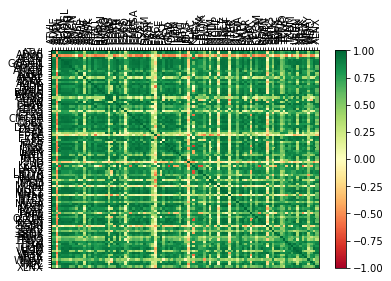

In [183]:
# designing and plotting the heatmap
df_corr = df.corr()
data = df_corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout
plt.show()